Model Coefficients:
Intercept: 4.14
Slope: 2.80

Model Performance:
Training R² Score: 0.758
Test R² Score: 0.807
Training RMSE: 0.921
Test RMSE: 0.809

Prediction for x = 1.5: 8.34


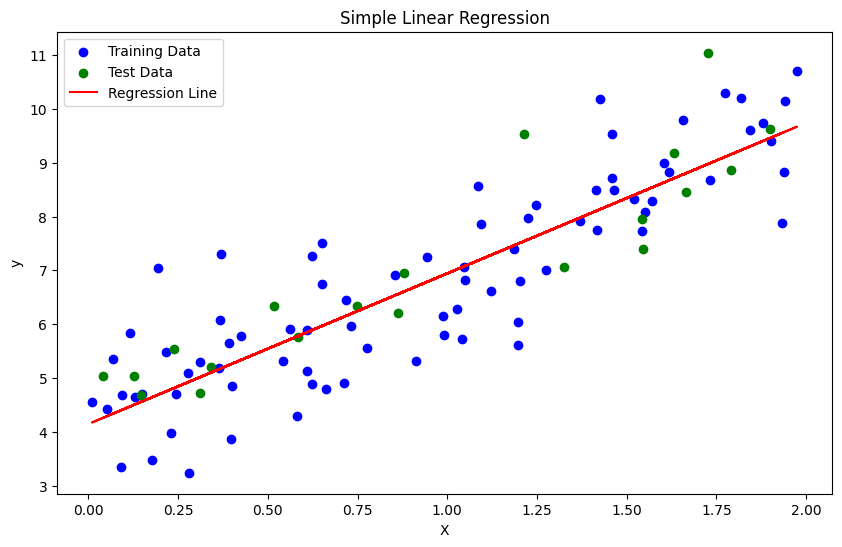

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Create visualization
plt.figure(figsize=(10, 6))

# Plot training data and predictions
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()

# Print model information
print(f"Model Coefficients:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Slope: {model.coef_[0][0]:.2f}")
print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Function to make new predictions
def predict_value(x):
    return model.predict([[x]])[0][0]

# Example prediction
new_x = 1.5
prediction = predict_value(new_x)
print(f"\nPrediction for x = {new_x}: {prediction:.2f}")

plt.show()


Model Summary:
Intercept: 4.25
Coefficient: 0.41

Model Performance:
Training R² Score: 0.034
Test R² Score: 0.034
Training RMSE: 1.896
Test RMSE: 2.339

Example Prediction:
Prediction for x = 1.50: 4.86


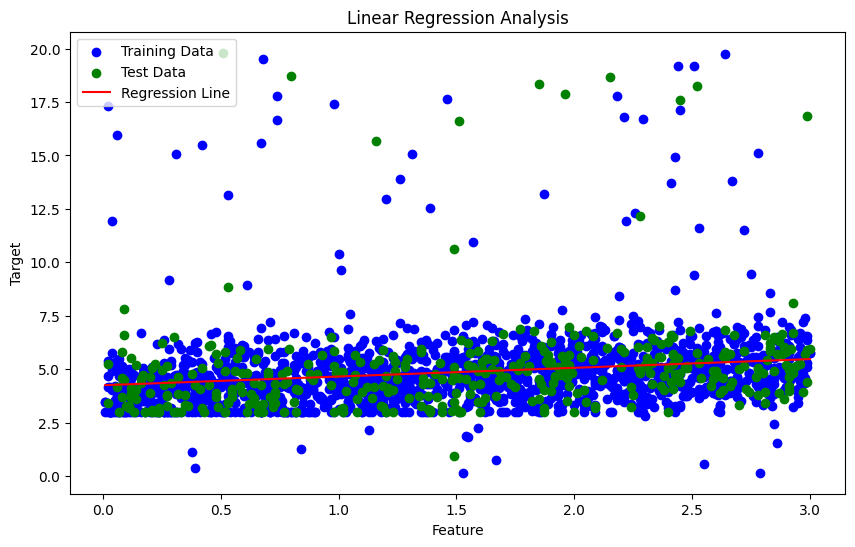


First few rows of the dataset:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  

Basic statistics of the dataset:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('sleeptime_prediction_dataset.csv')

X = df[['WorkoutTime']].values  # Feature column
y = df[['SleepTime']].values  # Target column

# Check for and handle missing values
X = pd.DataFrame(X).fillna(pd.DataFrame(X).mean())
y = pd.DataFrame(y).fillna(pd.DataFrame(y).mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Create visualization
plt.figure(figsize=(10, 6))

# Plot training data and predictions
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Sort X values for smooth line plot
X_sorted = np.sort(X, axis=0)
y_pred_sorted = model.predict(X_sorted)
plt.plot(X_sorted, y_pred_sorted, color='red', label='Regression Line')

plt.xlabel('Feature')  # Replace with actual feature name
plt.ylabel('Target')   # Replace with actual target name
plt.title('Linear Regression Analysis')
plt.legend()

# Print model information
print("\nModel Summary:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Function to make new predictions
def predict_value(x):
    return model.predict([[x]])[0][0]

# Example prediction
print("\nExample Prediction:")
x_example = X.mean()[0]  # Using mean value as example
prediction = predict_value(x_example)
print(f"Prediction for x = {x_example:.2f}: {prediction:.2f}")

# Save the plot
plt.savefig('regression_plot.png')
plt.show()

# Optional: Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Optional: Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('sleeptime_prediction_dataset.csv')

X = df[['WorkoutTime']].values  # Feature column
y = df[['SleepTime']].values  # Target column

# Check for and handle missing values
X = pd.DataFrame(X).fillna(pd.DataFrame(X).mean())
y = pd.DataFrame(y).fillna(pd.DataFrame(y).mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Create visualization
plt.figure(figsize=(10, 6))

# Plot training data and predictions
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Sort X values for smooth line plot
X_sorted = np.sort(X, axis=0)
y_pred_sorted = model.predict(X_sorted)
plt.plot(X_sorted, y_pred_sorted, color='red', label='Regression Line')

plt.xlabel('Feature')  # Replace with actual feature name
plt.ylabel('Target')   # Replace with actual target name
plt.title('Linear Regression Analysis')
plt.legend()

# Print model information
print("\nModel Summary:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Function to make new predictions
def predict_value(x):
    return model.predict([[x]])[0][0]

# Example prediction
print("\nExample Prediction:")
x_example = X.mean()[0]  # Using mean value as example
prediction = predict_value(x_example)
print(f"Prediction for x = {x_example:.2f}: {prediction:.2f}")

# Save the plot
plt.savefig('regression_plot.png')
plt.show()

def create_dataset_overview(df):
    # Calculate the number of numeric columns for statistics
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n_numeric = len(numeric_cols)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))
    
    # Grid specification
    gs = fig.add_gridspec(2, 2)
    
    # 1. Dataset Head
    ax1 = fig.add_subplot(gs[0, :])
    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=df.head().values,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center',
                     colColours=['#f2f2f2']*len(df.columns))
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    ax1.set_title('First Five Rows of Dataset', pad=20)
    
    # 2. Basic Statistics
    stats_df = df.describe()
    ax2 = fig.add_subplot(gs[1, :])
    ax2.axis('tight')
    ax2.axis('off')
    stats_table = ax2.table(cellText=stats_df.round(2).values,
                           colLabels=stats_df.columns,
                           rowLabels=stats_df.index,
                           cellLoc='center',
                           loc='center',
                           colColours=['#f2f2f2']*len(df.columns),
                           rowColours=['#f2f2f2']*len(stats_df.index))
    stats_table.auto_set_font_size(False)
    stats_table.set_fontsize(9)
    stats_table.scale(1.2, 1.5)
    ax2.set_title('Descriptive Statistics', pad=20)
    
    plt.tight_layout()
    return fig

# Example usage
# Replace 'your_file.csv' with your actual file name
df = pd.read_csv('sleeptime_prediction_dataset.csv')

# Create and display the visualization
fig = create_dataset_overview(df)
plt.show()

# Optional: Save the visualization
plt.savefig('dataset_overview.png', bbox_inches='tight', dpi=300)